# Proyek Analisis Data: Bike Sharing
- **Nama:** Deni Ramdani
- **Email:** den.rmdani@gmail.com
- **ID Dicoding:** den-rmdani

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda dari waktu ke waktu?
- Kapan jam-jam puncak untuk penyewaan sepeda?
- Pada musim apa registered dan casual users paling sering menggunakan jasa Bike Sharing?
- Apa faktor yang paling memengaruhi jumlah users baik itu registered maupun casual?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Data Wrangling

### Gathering Data

Data yang dipilih pada proyek ini adalah "**bike sharing dataset**" yang terdiri dari dua file csv. "**hour.csv**" untuk data *bike sharing* basis jam, dan "**day.csv**" untuk data *bike sharing* basis hari. Namun pada projek kali ini, kita cukup menggunakan data **hour.csv**.

In [2]:
#Load data
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [3]:
#Checking the data type of each column
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
#Checking the number of missing values
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
#Checking number of duplicated data
hour_df.duplicated().sum()

0

In [6]:
#Checking statistical parameters
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Setelah melakukan *assesing data*, data yang digunakan:
1. Tipe data sudah sesuai kecuali kolom dteday yang sebelumnya bertipe objek perlu diubah menjadi tipe data datetime 
2. Tidak ada *missing value*
3. Tidak ada data duplikat 

### Cleaning Data

In [7]:
#Dropping unused columns
hour_df.drop(['instant'], axis = 1, inplace= True)

In [8]:
#Rename the column
hour_df.rename(columns={'dteday':'date',
                        'yr':'year',
                       'mnth':'month',
                       'weekday':'day', 
                       'weathersit':'weather_situation', 
                       'windspeed':'wind_speed',
                       'cnt':'total',
                        'hr':'hour',
                       'hum':'humidity'},inplace=True)

In [9]:
#Change the data type of the date column
hour_df['date'] = pd.to_datetime(hour_df['date'])

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               17379 non-null  datetime64[ns]
 1   season             17379 non-null  int64         
 2   year               17379 non-null  int64         
 3   month              17379 non-null  int64         
 4   hour               17379 non-null  int64         
 5   holiday            17379 non-null  int64         
 6   day                17379 non-null  int64         
 7   workingday         17379 non-null  int64         
 8   weather_situation  17379 non-null  int64         
 9   temp               17379 non-null  float64       
 10  atemp              17379 non-null  float64       
 11  humidity           17379 non-null  float64       
 12  wind_speed         17379 non-null  float64       
 13  casual             17379 non-null  int64         
 14  regist

In [11]:
# Replace values for 'season' column
hour_df['season'] = hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Replace values for 'day' column
hour_df['day'] = hour_df['date'].dt.day_name()

# Replace values for 'month' column
hour_df['month'] = hour_df['date'].dt.month_name()

# Replace values for 'year' column
hour_df['year'] = hour_df['date'].dt.year

In [12]:
#Change the data type of the day column
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_df['day'] = pd.Categorical(hour_df['day'], categories=day_order, ordered=True)

In [13]:
#Change the data type of the columns
columns = ['season', 'holiday', 'workingday', 'weather_situation', 'day']

for column in columns:
    hour_df[column] =  hour_df[column].astype("category")

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               17379 non-null  datetime64[ns]
 1   season             17379 non-null  category      
 2   year               17379 non-null  int32         
 3   month              17379 non-null  object        
 4   hour               17379 non-null  int64         
 5   holiday            17379 non-null  category      
 6   day                17379 non-null  category      
 7   workingday         17379 non-null  category      
 8   weather_situation  17379 non-null  category      
 9   temp               17379 non-null  float64       
 10  atemp              17379 non-null  float64       
 11  humidity           17379 non-null  float64       
 12  wind_speed         17379 non-null  float64       
 13  casual             17379 non-null  int64         
 14  regist

In [15]:
#Convert temp, atemp, humidity, and wind speed values to actual values
hour_df['temp'] = hour_df['temp']*41
hour_df['atemp'] = hour_df['atemp']*50
hour_df['humidity'] = hour_df['humidity']*100
hour_df['wind_speed'] = hour_df['wind_speed']*67


Pada tahap ini,
- Kolom yang tidak digunakan adalah kolom 'instant'.
- Kolom `dteday, yr, mnth, weekday, weathersit, windspeed, cnt,` dan `hum,` menjadi `date, year, month, day, weather_situation, wind_speed, total,` dan `humidity`.
- Mengubah tipe data kolom kategorikal menjadi 'category'.
- Mengubah tipe data `date` menjadi datetime.
- Mengonversikan data `temp, atemp, humidity,` dan `wind_sqpeed` yang dinormalisasi menjadi nilai sebenarnya.


## Exploratory Data Analysis (EDA)

In [16]:
hour_df.describe()

,date,year,hour,temp,atemp,humidity,wind_speed,casual,registered,total
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2011.502561,11.546752,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,2011.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2011.000000,6.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,2012.000000,12.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,2012.000000,18.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,2012.000000,23.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,0.500008,6.914405,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599


In [17]:
colors=['#367BE0', '#E04A36', '#B9E036']

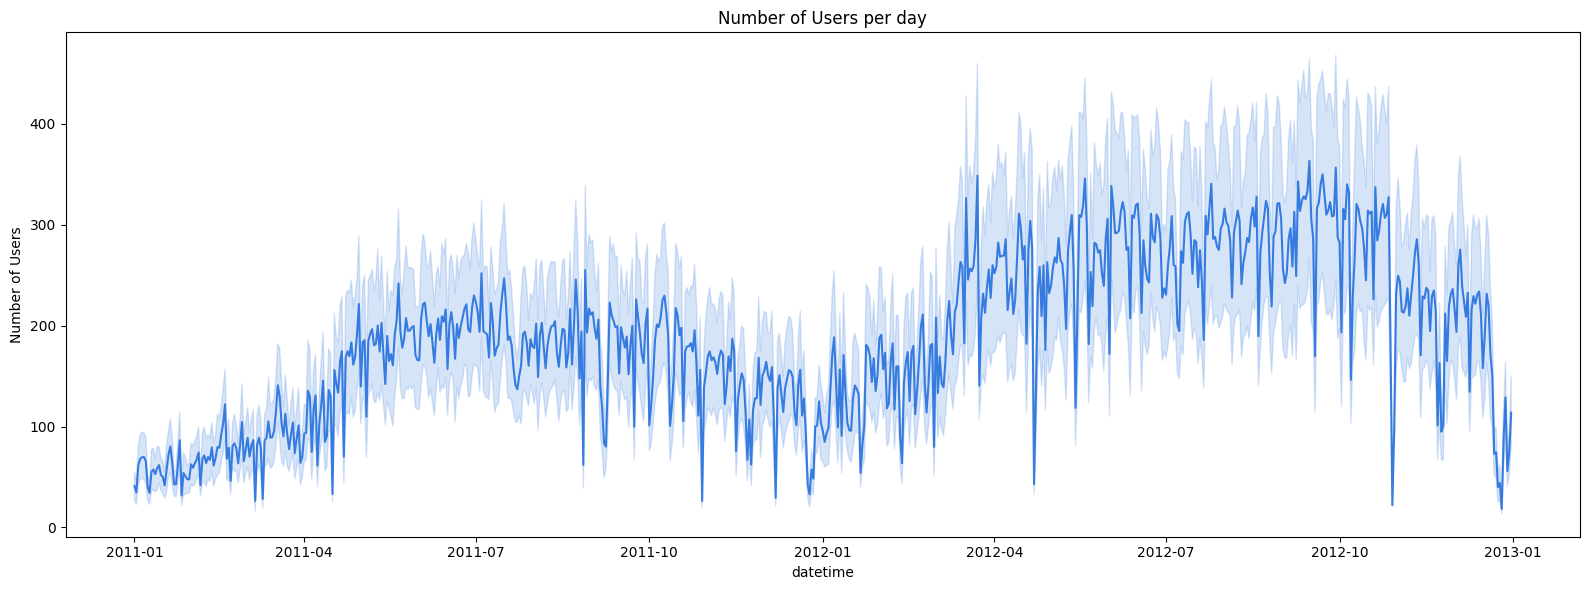

In [18]:
# create a line plot for user data per day
plt.figure(figsize=(16, 6))
sns.lineplot(x='date', y="total", data=hour_df, color=colors[0])

# add label and title
plt.ylabel("Number of Users")
plt.xlabel("datetime")
plt.title("Number of Users per day")

# Showing the plot
plt.tight_layout()
plt.show()

- Puncak kenaikan jumlah user selalu terjadi pada pertengahan tahun. 
- Jumlah user tahun 2012 lebih tinggi daripada tahun 2011.

In [19]:
#Resampling hourly data into monthly
monthly_df = hour_df.resample(rule='M', on='date').agg({
    "temp": "mean",
    "atemp": "mean",
    "humidity": "mean",
    "wind_speed": "mean",
    "casual": "sum",
    "registered": "sum",
    "total": "sum"
})

C:\Users\dnrd9\AppData\Local\Temp\ipykernel_14224\4046506330.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = hour_df.resample(rule='M', on='date').agg({


In [20]:
#Grouping data by hour
hourly_df = hour_df.groupby(by=['hour','season']).agg({
    "casual": "mean",
    "registered": "mean",
    "total": "mean"
}).reset_index()

hourly_df

C:\Users\dnrd9\AppData\Local\Temp\ipykernel_14224\226895247.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_df = hour_df.groupby(by=['hour','season']).agg({


,hour,season,casual,registered,total
0,0,Fall,16.540107,57.374332,73.914439
1,0,Spring,3.393258,24.011236,27.404494
2,0,Summer,12.402174,44.440217,56.842391
3,0,Winter,7.887006,48.446328,56.333333
4,1,Fall,9.650538,34.069892,43.720430
...,...,...,...,...,...
91,22,Winter,15.265537,108.299435,123.564972
92,23,Fall,25.342246,97.577540,122.919786
93,23,Spring,4.522222,39.888889,44.411111
94,23,Summer,19.461957,76.521739,95.983696


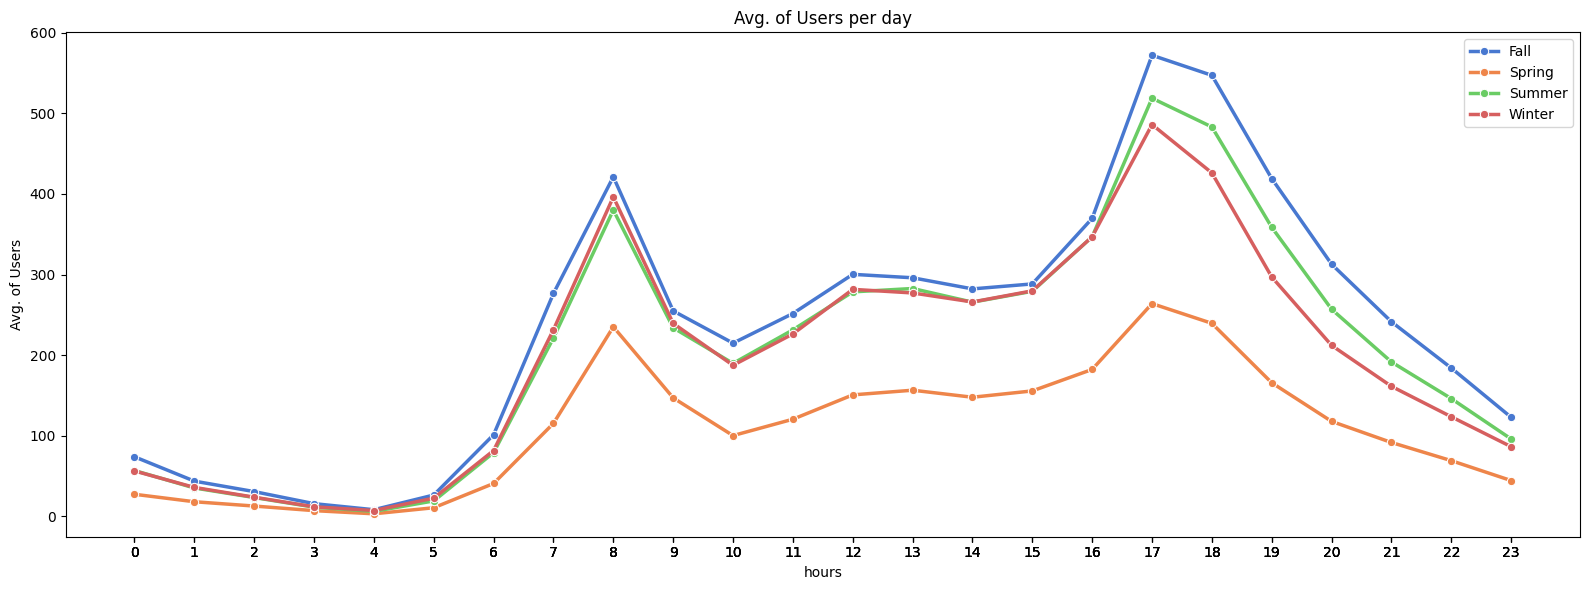

In [21]:
# create line plot for average hourly user data
plt.figure(figsize=(16, 6))
sns.lineplot(data=hourly_df, x='hour', y='total', hue='season', palette='muted', marker='o',
            linewidth=2.5)

# Add label, legend, and title
plt.ylabel("Avg. of Users")
plt.xlabel("hours")
plt.title("Avg. of Users per day")
plt.legend()
plt.xticks(hourly_df['hour'])

# Showing the plot
plt.tight_layout()
plt.show()

C:\Users\dnrd9\AppData\Local\Temp\ipykernel_14224\2891389217.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_df= hour_df.groupby('season').agg({


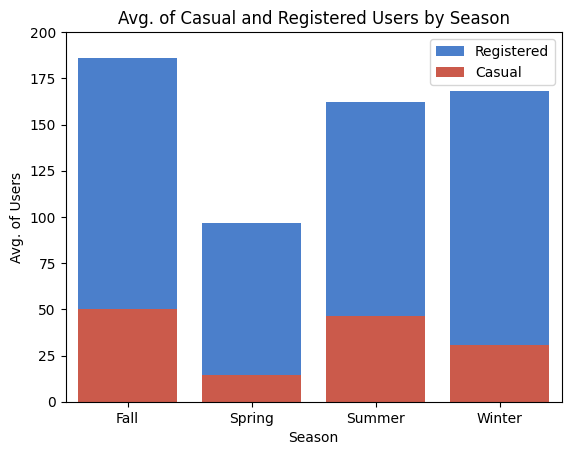

In [22]:
#Grouping data by season
season_df= hour_df.groupby('season').agg({
    'registered':'mean',
    'casual':'mean',
    'total': 'mean'
}).reset_index()

#create bar chart
fig1, ax1 = plt.subplots()

sns.barplot(x='season', y='registered', data=season_df, ax=ax1, label='Registered', color=colors[0])
sns.barplot(x='season', y='casual', data=season_df, ax=ax1, label='Casual', color=colors[1])

ax1.set_ylabel("Avg. of Users")
ax1.set_xlabel("Season")
ax1.set_title("Avg. of Casual and Registered Users by Season")
ax1.set_ylim((0,200))
ax1.legend(loc='upper right')


Rata-rata *users* paling tinggi adalah pada musim gugur (*fall*), dan jumlah tersebut didominasi oleh *registered users* 

C:\Users\dnrd9\AppData\Local\Temp\ipykernel_14224\2244709370.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_df= hour_df.groupby('weather_situation').agg({
C:\Users\dnrd9\AppData\Local\Temp\ipykernel_14224\2244709370.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  weather_df['weather_situation'] = weather_df['weather_situation'].replace({1: 'Clear/Partly Cloudly', 2: 'Misty/Cloudy',


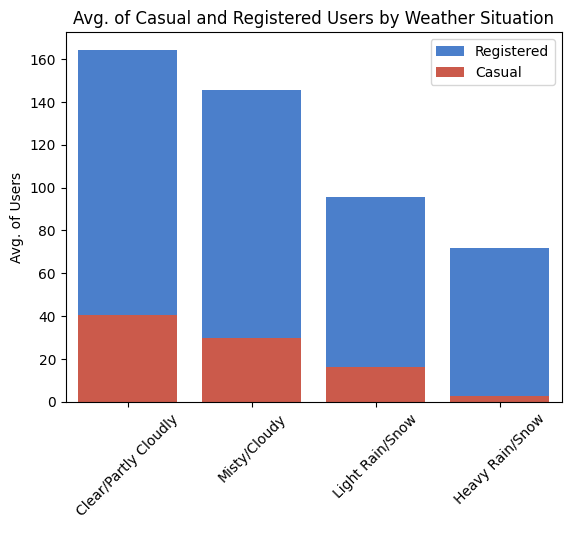

In [23]:
#Grouping data by weather situation
weather_df= hour_df.groupby('weather_situation').agg({
    'casual':'mean',
    'registered':'mean',
    'total': 'mean'
}).reset_index()

weather_df['weather_situation'] = weather_df['weather_situation'].replace({1: 'Clear/Partly Cloudly', 2: 'Misty/Cloudy', 
                                                                          3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'})

sns.barplot(x='weather_situation', y='registered', data=weather_df, label='Registered', color=colors[0])
sns.barplot(x='weather_situation', y='casual', data=weather_df, label='Casual', color=colors[1])
plt.ylabel("Avg. of Users")
plt.xlabel(" ")
plt.title("Avg. of Casual and Registered Users by Weather Situation")
plt.xticks(rotation=45)
plt.legend()

Keterangan:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Rata-rata *users* menggunakan jasa *bike-sharing* saat keadaan cuaca relatif cerah berawan

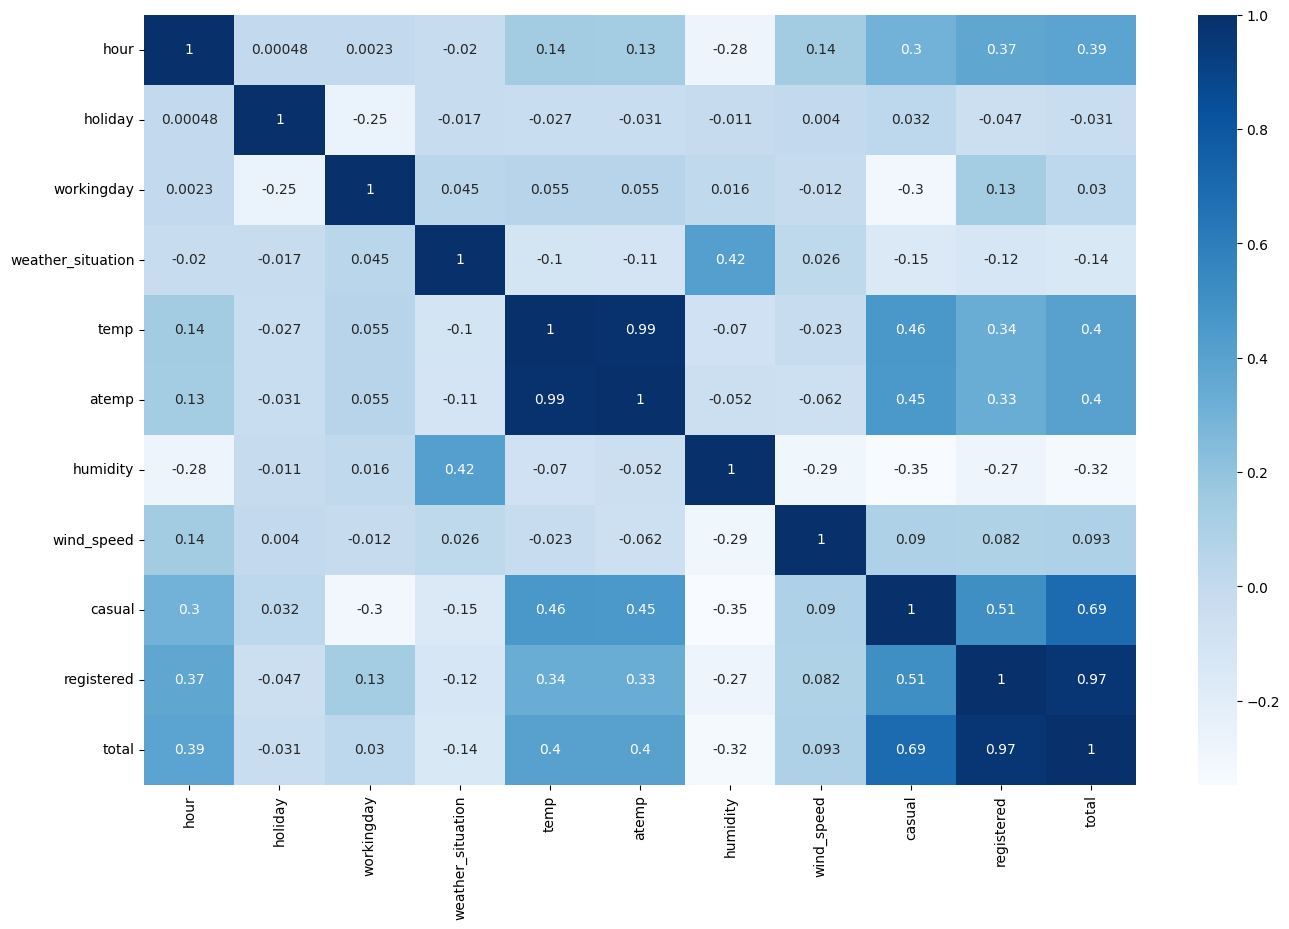

In [24]:
#Correlation Matrix
corr_matrix = hour_df[['hour','holiday','workingday','weather_situation','temp','atemp',
                       'humidity','wind_speed','casual','registered','total' ]].corr()

#Create corelation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

- Korelasi antara casual, registered terhadap total tentu akan tinggi (mendekati 1)
- Casual dan registered users memiliki korelasi paling tinggi dengan `temp` dan `atemp` dibandingkan faktor lingkungan lain.
- Total users berkorelasi dengan `temp` dan `atemp` (corr = 0.4), dan `humidity` (corr = -0.32).

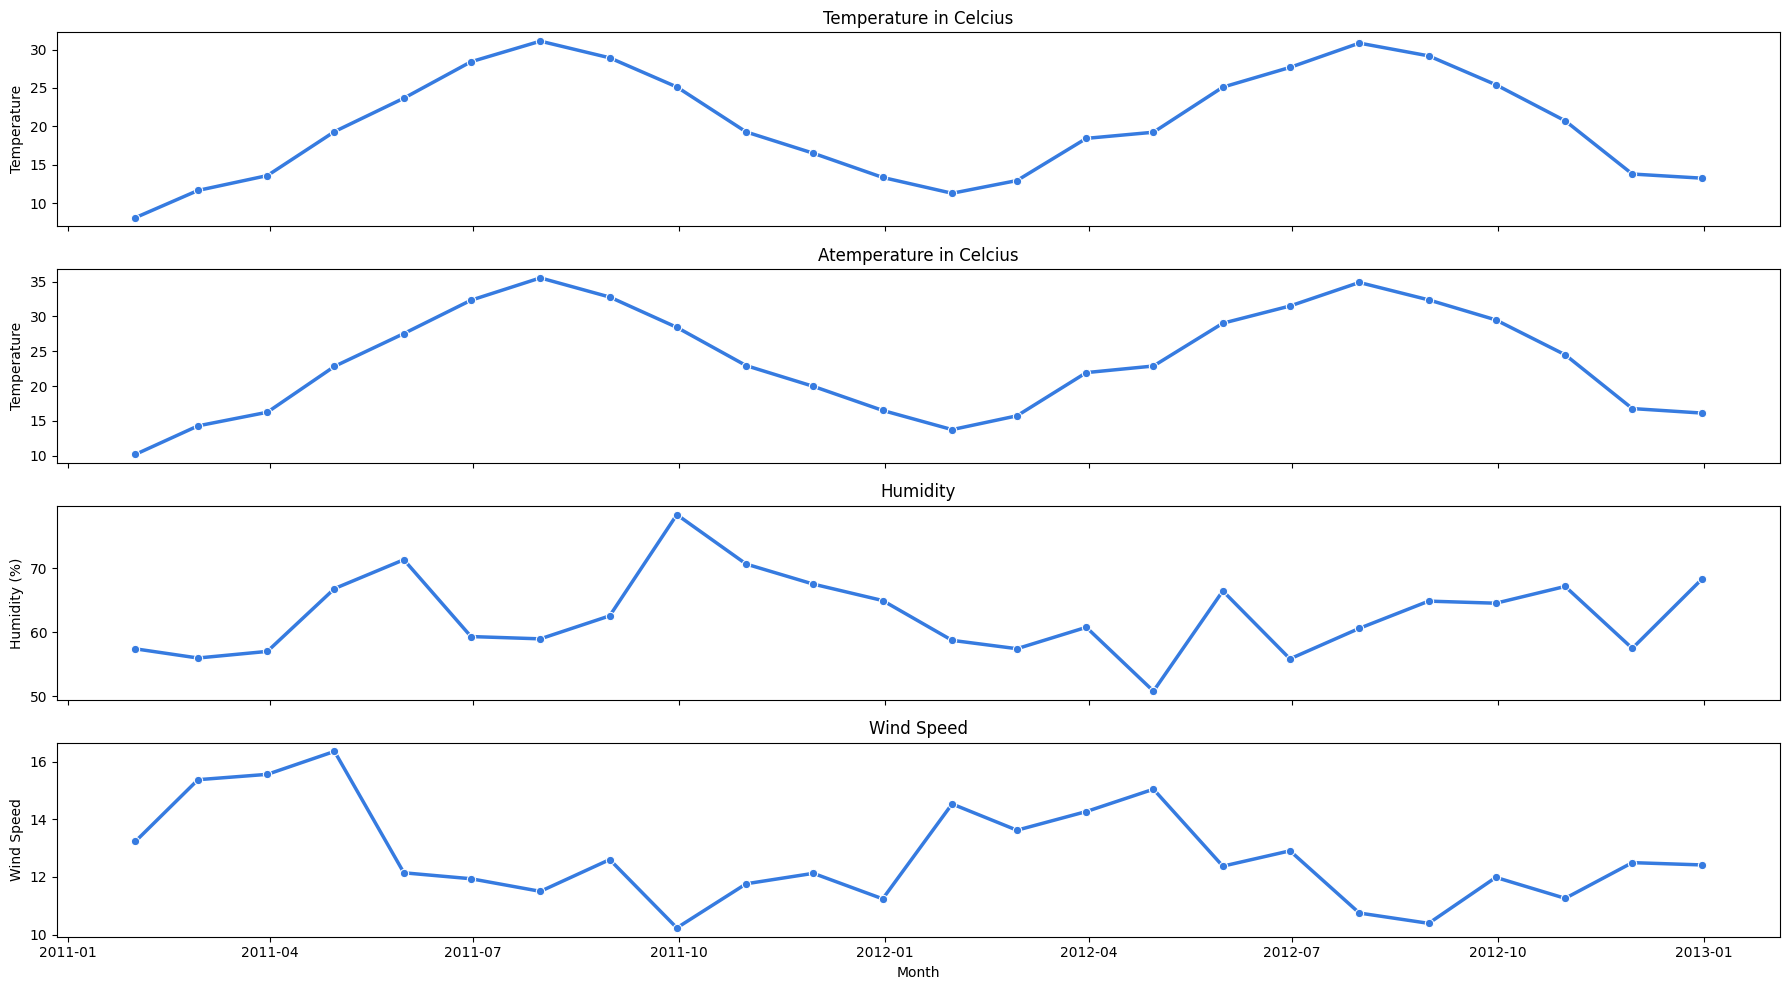

In [25]:
#Create the monthly average of evironment condition
fig3, ax3 = plt.subplots(nrows=4, ncols=1, figsize=(18,10), sharex=True)

#1st plot
sns.lineplot(x='date', y='temp', data=monthly_df, color=colors[0], ax=ax3[0], marker='o', linewidth=2.5)
ax3[0].set_ylabel("Temperature")
ax3[0].set_title("Temperature in Celcius")

#2nd plot
sns.lineplot(x='date', y='atemp', data=monthly_df, color=colors[0], ax=ax3[1], marker='o', linewidth=2.5)
ax3[1].set_ylabel("Temperature")
ax3[1].set_title("Atemperature in Celcius")

#3rd plot
sns.lineplot(x='date', y='humidity', data=monthly_df, color=colors[0], ax=ax3[2], marker='o', linewidth=2.5)
ax3[2].set_ylabel("Humidity (%)")
ax3[2].set_title("Humidity")

#4th plot
sns.lineplot(x='date', y='wind_speed', data=monthly_df, color=colors[0], ax=ax3[3], marker='o', linewidth=2.5)
ax3[3].set_ylabel("Wind Speed")
ax3[3].set_title("Wind Speed")

ax3[3].set_xlabel("Month")

#Showing the plots
plt.tight_layout()
plt.show()

Terlihat bahwa rata-rata bulanan `temp` dan `atemp` bersesuaian dengan *time-series* `total` *users*. Hal ini membuktikan korelasi positif antara `temp`, `atemp` dengan `total` yang sesuai dengan *correlation heatmap*-nya.

Namun berbeda dengan rata-rata bulanan `humidity` yang memiliki pola berkebalikan dengan *time-series* `total` *users* yang membuktikan memiliki korelasi negatif.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda dari waktu ke waktu?

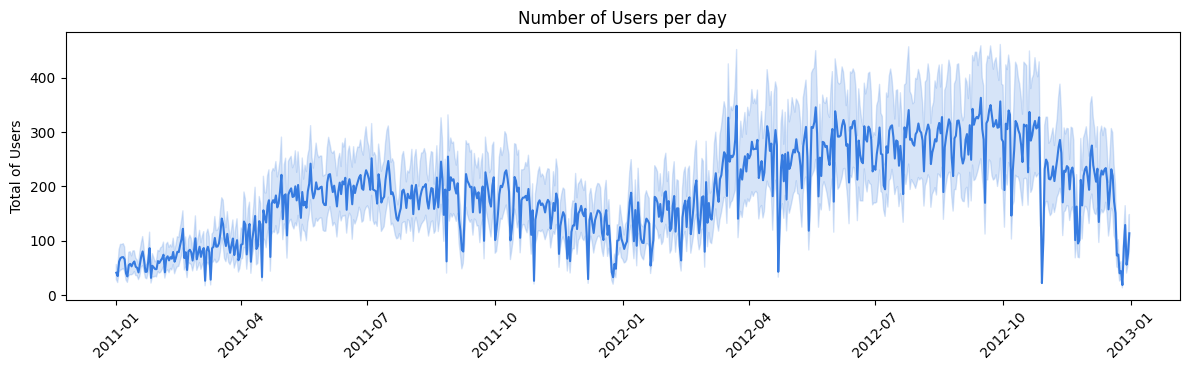

In [26]:
#create a line plot for user data per day
plt.figure(figsize=(12, 4))
sns.lineplot(x='date', y="total", data=hour_df, color=colors[0])

#add labels and title
plt.ylabel("Total of Users")
plt.xlabel(" ")
plt.title("Number of Users per day")

plt.xticks(rotation=45)

#Showing the plot
plt.tight_layout()
plt.show()

- Jumlah *users* mencapai puncaknya ketika pertengahan tahun dan menurun menuju akhir tahun.
- Jumlah *users* mengalami kenaikan antara tahun 2011-2012.

### Pertanyaan 2: Kapan jam-jam puncak untuk penyewaan sepeda?

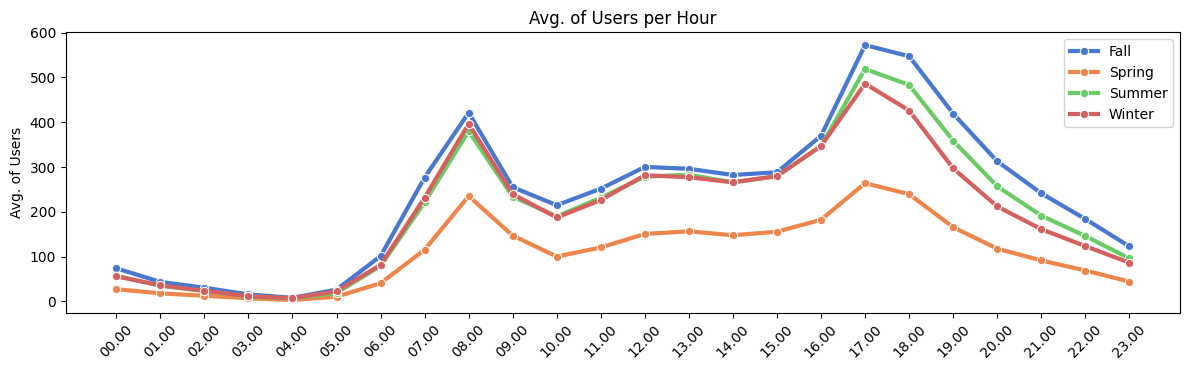

In [27]:
hour_labels = [f'{int(h):02d}.00' for h in hourly_df['hour'].unique()] 

# create line plot for average hourly user data
plt.figure(figsize=(12, 4))
sns.lineplot(data=hourly_df, x='hour', y='total', hue='season', palette='muted', marker='o',
            linewidth=3)

# Add label, legend, and title
plt.ylabel("Avg. of Users")
plt.xlabel(" ")
plt.title("Avg. of Users per Hour")
plt.legend()
plt.xticks(ticks=hourly_df['hour'].unique(), labels=hour_labels, rotation=45)

# Showing the plot
plt.tight_layout()
plt.show()

Data di atas merupakan rata-rata jumlah *user* per jam dari setiap musim.
- Pola penggunaan setiap musim per jam memiliki kesamaan.
- Jam-jam puncak penyewaan terjadi pada pagi hari pukul 08.00 waktu setempat, dan sore hari pada pukul 17.00-18.00 waktu setempat.

### Pertanyaan 3: Pada musim apa registered dan casual users paling sering menggunakan jasa Bike Sharing?

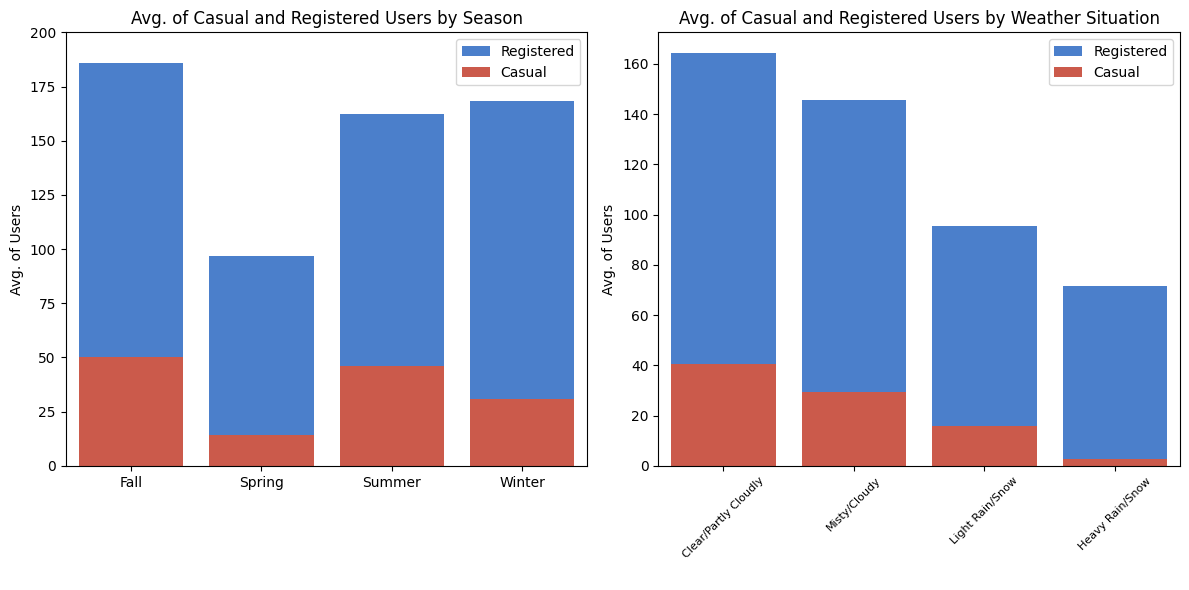

In [28]:
#create bar chart
fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

sns.barplot(x='season', y='registered', 
            data=season_df, ax=ax1[0],
            label='Registered', color=colors[0])
sns.barplot(x='season', y='casual', 
            data=season_df, ax=ax1[0],
            label='Casual', color=colors[1])

ax1[0].set_ylabel("Avg. of Users")
ax1[0].set_xlabel(" ")
ax1[0].set_title("Avg. of Casual and Registered Users by Season")
ax1[0].set_ylim((0,200))
ax1[0].legend(loc='upper right')

sns.barplot(x='weather_situation', y='registered', 
            data=weather_df, ax=ax1[1], 
            label='Registered', color=colors[0])
sns.barplot(x='weather_situation', y='casual', 
            data=weather_df, ax=ax1[1], 
            label='Casual', color=colors[1])
ax1[1].set_ylabel("Avg. of Users")
ax1[1].set_xlabel(" ")
ax1[1].set_title("Avg. of Casual and Registered Users by Weather Situation")
plt.xticks(rotation=45, fontsize=8)
ax1[1].legend()

# Showing the plot
plt.tight_layout()
plt.show()


- *Registered users* mendominasi penyewaan sepeda.
- *Users* paling sering menggunakan jasa *bike-sharing* ketika musim gugur dengan situasi cuaca cerah atau sedikit berawan.

### Pertanyaan 4: Apa faktor yang paling memengaruhi jumlah users baik itu registered maupun casual?

Berdasarkan korelasi matriks sebelumnya, faktor yang paling memengaruhi jumlah *users* adalah temperatur dan kelembapan udara.

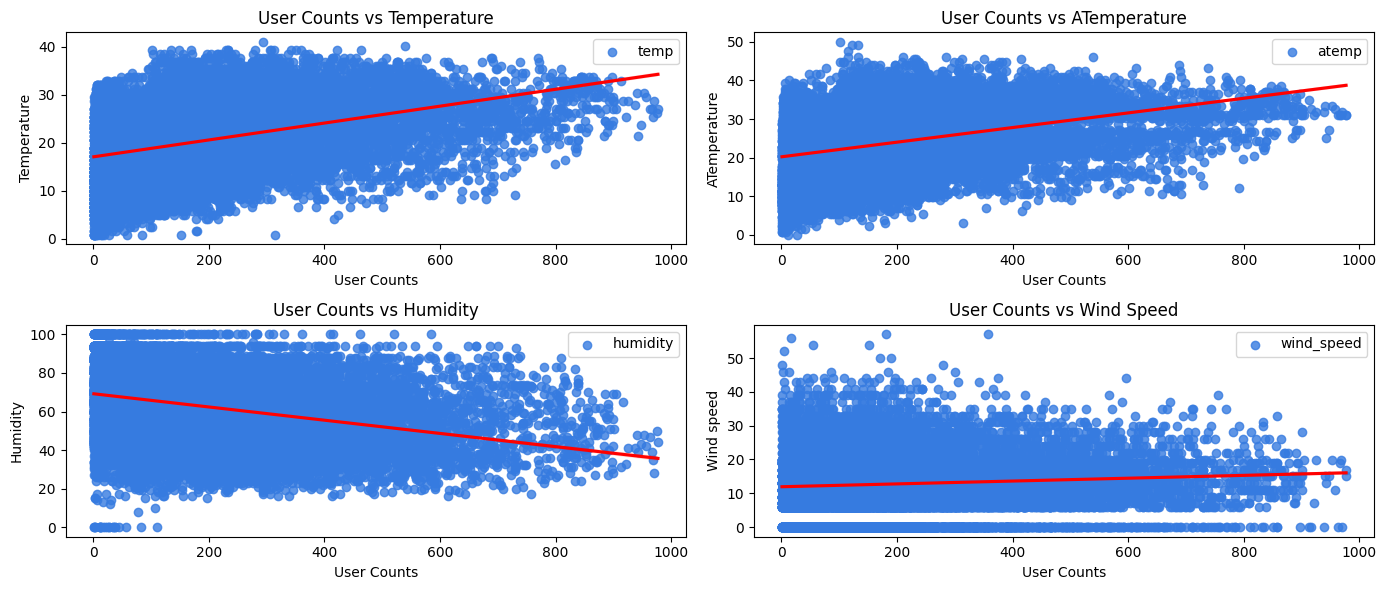

In [29]:
#Creating subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

#1st plot
sns.regplot(x='total', y='temp', data=hour_df, label='temp', color=colors[0], line_kws={'color': 'red'}, ax=axes[0][0])
axes[0][0].set_ylabel("Temperature")
axes[0][0].set_xlabel("User Counts")
axes[0][0].set_title("User Counts vs Temperature")
axes[0][0].legend()

#2nd plot
sns.regplot(x='total', y='atemp', data=hour_df, label='atemp', color=colors[0], line_kws={'color': 'red'}, ax=axes[0][1])
axes[0][1].set_ylabel("ATemperature")
axes[0][1].set_xlabel("User Counts")
axes[0][1].set_title("User Counts vs ATemperature")
axes[0][1].legend()

#3rd plot
sns.regplot(x='total', y='humidity', data=hour_df, label='humidity', color=colors[0], line_kws={'color': 'red'}, ax=axes[1][0])
axes[1][0].set_ylabel("Humidity")
axes[1][0].set_xlabel("User Counts")
axes[1][0].set_title("User Counts vs Humidity")
axes[1][0].legend()

#4th plot
sns.regplot(x='total', y='wind_speed', data=hour_df, label='wind_speed', color=colors[0], line_kws={'color': 'red'}, ax=axes[1][1])
axes[1][1].set_ylabel("Wind speed")
axes[1][1].set_xlabel("User Counts")
axes[1][1].set_title("User Counts vs Wind Speed")
axes[1][1].legend()

#Showing plot
plt.tight_layout()
plt.show()


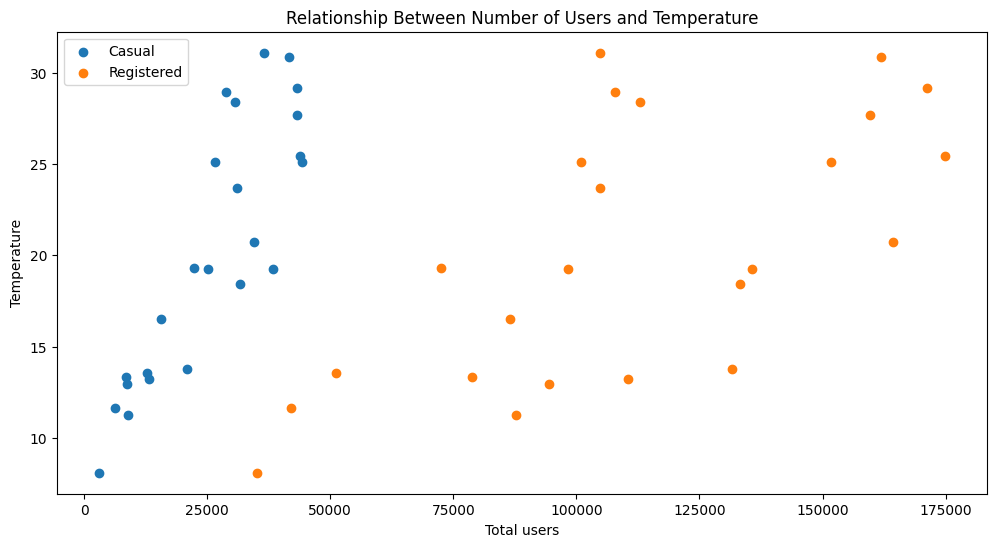

In [30]:
#Creating figure
plt.figure(figsize=(12, 6))

plt.scatter(monthly_df['casual'], monthly_df['temp'], label='Casual')
plt.scatter(monthly_df['registered'], monthly_df['temp'], label='Registered')
plt.xlabel('Total users')
plt.ylabel('Temperature')
plt.legend()
plt.title('Relationship Between Number of Users and Temperature')
plt.show()

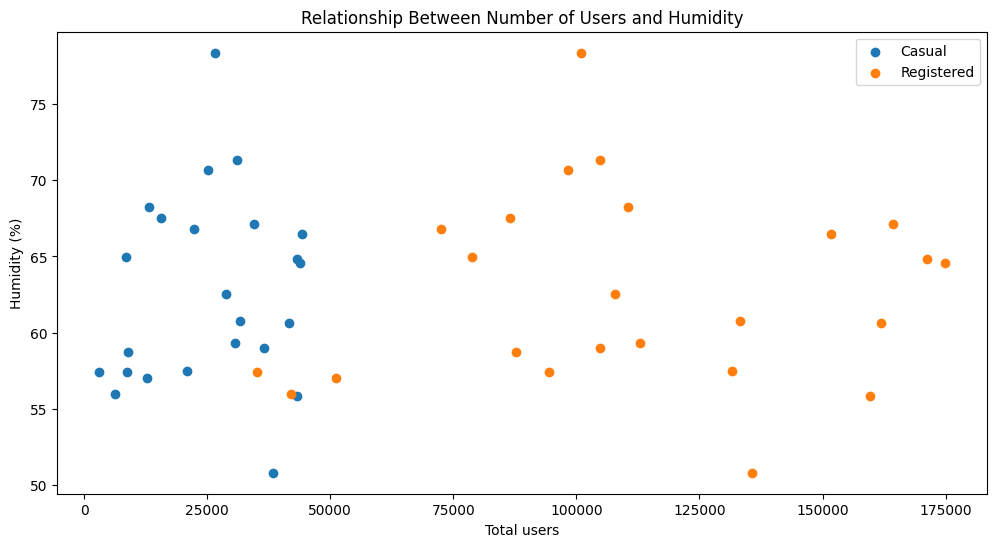

In [31]:
#Creating figure
plt.figure(figsize=(12, 6))

plt.scatter(monthly_df['casual'], monthly_df['humidity'], label='Casual')
plt.scatter(monthly_df['registered'], monthly_df['humidity'], label='Registered')
plt.xlabel('Total users')
plt.ylabel('Humidity (%)')
plt.legend()
plt.title('Relationship Between Number of Users and Humidity')
plt.show()

## Clustering

In [40]:
# Determine the average of total users
avg_total_users = hour_df['total'].mean()

In [42]:
# Determine cluster based on number of users
def label_usage(hourly_users):
    if hourly_users < avg_total_users * 0.5:  # Di bawah 50% dari rata-rata
        return 'Low Usage'
    elif avg_total_users * 0.5 <= hourly_users < avg_total_users * 1.5:  # Di antara 50%-150% dari rata-rata
        return 'Medium Usage'
    else:
        return 'High Usage'  # Di atas 150% dari rata-rata

# Applying the function to dataframe
hour_df['usage_cluster'] = hour_df['total'].apply(label_usage)

*Clustering* yang digunakan pada tahap ini merupakan clustering sederhana dengan ketentuan. Jika `hourly_users` kurang dari `0.5*avg_total_users` maka `usage_label = 'Low Usage'`. Jika `hourly_users` di antara `0.5*avg_total_users` dan `1.5*avg_total_users` maka `usage_label = 'Medium'`. Jika tidak maka `usage_label = 'High Usage'` 

C:\Users\dnrd9\AppData\Local\Temp\ipykernel_14224\2220606051.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


<Figure size 2800x400 with 0 Axes>

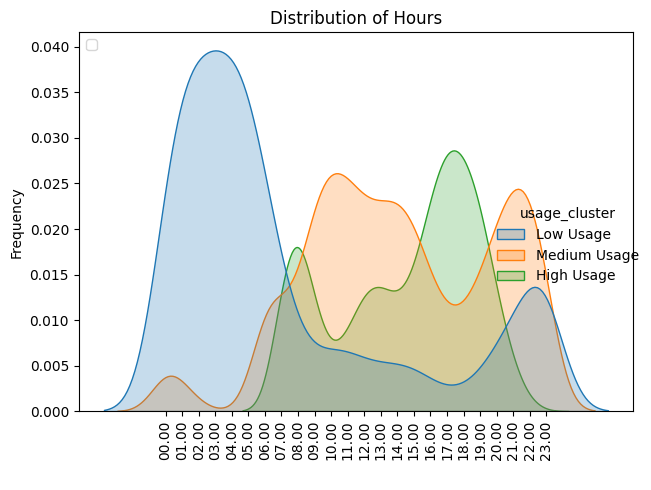

In [69]:
# Plot for distribution of Hours
plt.figure(figsize=(28, 4))
sns.displot(data=hour_df, x='hour', hue='usage_cluster', kind='kde', fill=True)
plt.title('Distribution of Hours')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.xticks(ticks=cluster_df['hour'].unique(), labels=hour_labels, rotation=90)

# Add border (box) to the plot
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)


plt.tight_layout()
plt.show()

Grafik di atas digunakan untuk memperkirakan jam batas dari setiap cluster

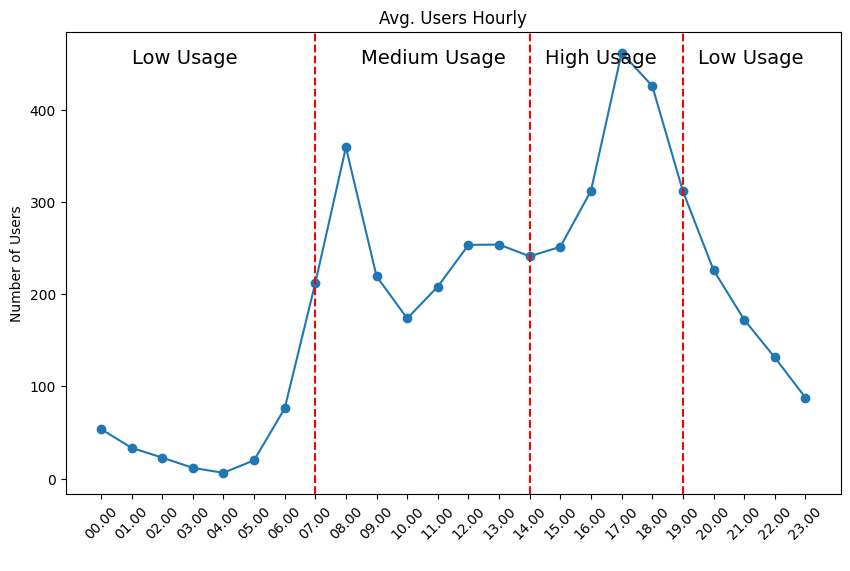

In [72]:
cluster_df = hour_df.groupby(by='hour').agg({
    'casual': 'mean',
    'registered': 'mean',
    'total': 'mean'
}).reset_index()

# Plot Avg. users hourly
plt.figure(figsize=(10, 6))
plt.plot(cluster_df['hour'], cluster_df['total'], marker='o')
plt.title('Avg. Users Hourly')
plt.xlabel(' ')
plt.ylabel('Number of Users')
plt.xticks(ticks=cluster_df['hour'].unique(), labels=hour_labels, rotation=45)
#plt.grid(True)

# Menambahkan garis vertikal putus-putus di jam 5, 10, 15, dan 20
plt.axvline(x=7, linestyle='--', color='red')
plt.axvline(x=14, linestyle='--', color='red')
plt.axvline(x=19, linestyle='--', color='red')

# Adding annotation
plt.text(x=1, y=450, s='Low Usage', fontsize=14, color='black')
plt.text(x=8.5, y=450, s='Medium Usage', fontsize=14, color='black')
plt.text(x=14.5, y=450, s='High Usage', fontsize=14, color='black')
plt.text(x=19.5, y=450, s='Low Usage', fontsize=14, color='black')

plt.show()

Garis putus-putus menunjukkan batas-batas dari setiap cluster

## Conclusion

- Jumlah *users* mengalami kenaikan setiap tahun (2011-2012), dan mengalami pola musiman. Jumlah *users* mengalami puncak pada setiap pertengahan tahun dan mengalami penurunan setiap akhir tahun.
- Jam-jam penyewaan memiliki pola yang sama untuk setiap musim, dan mengalami puncak pada pukul 08.00 waktu setempat dan pukul 17.00 waktu setempat. Jam-jam puncak tersebut diduga bertepatan dengan berangkat kerja dan pulang kerja.
- Jumlah *users* mengalami puncak pada musim gugur (*fall*) dan penurunan pada musim semi (*spring*). Jumlah *users* mengalami kenaikan pada cuaca cerah atau sedikit berawan dan menurun ketika cuaca sedang hujan atau turun salju lebat.
- Diantara temperatur, kelembapan udara, dan kecepatan angin yang memiliki korelasi cukup tinggi adalah temperatur (korelasi positif), dan kelembapan (korelasi negatif). Hal tersebut mengindikasikan bahwa selain musim dan cuaca, faktor yang memengaruhi jumlah *users* adalah temperatur dan kelembapan udara.

Pola dari jumlah *users* dari waktu ke waktu dipengaruhi oleh tren musiman (4 musim), cuaca, temperatur, dan kelembapan udara.

Teridentifikasi bahwa jam-jam *high usage* terjadi pada pukul 14.00 - 19.00, *medium usage* pada pukul 07.00 - 14.00, dan *low usage* pada 19.00 - 07.00.